## Getting up to speed with Data Science challenges

This notebook is the first attempt in preparing for a data science interview. I will limit my work to around 2 hours for the challenge. Afterwards I will walk through what others have done and evaluate my performance.

Modelling process
* Perform Exploratory data analysis
* Data cleaning
* Feature engineering
* Running models
* * Linear regression
* * Tree based methods
* * Logistic regression

We are testing this:
- Get comfortable with similar exercises found on hackerank even those that may not be the most relevant
- Get comfy with pandas, numpy and sklearn
- Get comfortable quickly implementing simple versions of ML algorithms mha sklearn

### Evaluation after completion
Lets see if I end up doing it (i did in the bottom)



In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
# datetime object containing current date and time
competition_start_time = datetime.now()
print("date and time =", competition_start_time.strftime("%d/%m/%Y %H:%M:%S"))

date and time = 16/02/2023 14:41:46


### EDA

In [17]:
# load data
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

We now have the data loaded in and will check out the training dataset. What we will look at the the quality of the data. The attributes. Distributions. Missing values. Correlation.

**Data Dictionary**

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |



### Variable Notes

**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Seems like the values are alright. Lets take a look the age, survivor, and fare distributions

In [46]:
df_train[['Die', 'Surv']] = pd.get_dummies(df_train.Survived)

In [47]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Die,Surv
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.005007,-0.005007
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.338481,-0.338481
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.077221,-0.077221
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.035322,-0.035322
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.081629,0.081629
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.257307,0.257307
Die,0.005007,-1.000000,0.338481,0.077221,0.035322,-0.081629,-0.257307,1.000000,-1.000000
Surv,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000


We see that Pclass has a negative correlation with the survivability which makes sense. Higher class is more likely to be saved. Age raw has a very little correlation, but one could imagine kids would have a high probability of being saved. Since Fare is very correlated with Parch and Sib, maybe this means that the total fare is shown for the purchase where onces ticket is included and not just the single ticket price

In [49]:
len(df_train.Fare.unique())

248

There are not of different fare prices. Let's look at their distribution

In [50]:
import matplotlib.pyplot as plt

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

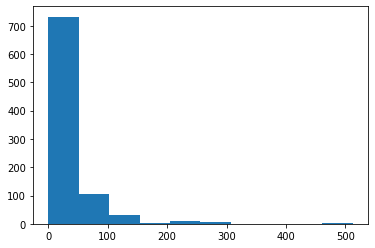

In [51]:
plt.hist(df_train.Fare)

(array([ 84., 373.,  78., 113.,  49.,  23.,  12.,  36.,   7.,  14.,  28.,
         11.,  10.,   0.,   4.,   7.,   4.,   0.,   7.,   2.]),
 array([  0.     ,   7.32604,  14.65208,  21.97812,  29.30416,  36.6302 ,
         43.95624,  51.28228,  58.60832,  65.93436,  73.2604 ,  80.58644,
         87.91248,  95.23852, 102.56456, 109.8906 , 117.21664, 124.54268,
        131.86872, 139.19476, 146.5208 ]),
 <BarContainer object of 20 artists>)

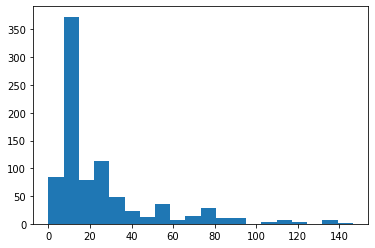

In [55]:
plt.hist([x for x in df_train.Fare.values if x<150], bins=20)

Most people seem to pay the same price. There might be simething here, but we will go on as this could be captured by the fare class.

### Priority for kids and mothers?

In [89]:
df_train['kid']=df_train.Age.apply(lambda x: 1 if x<7 else 0)
df_train['mother']=0
for idx, row in df_train.iterrows():
    if row.Sex =="female" and row.Parch and row.Age>20:
        df_train.loc[idx,['mother']] = 1

In [90]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Die,Surv,kid,mother
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.005007,-0.005007,-0.011576,0.072091
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000,0.154447,0.205435
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.338481,-0.338481,0.075072,-0.096645
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.077221,-0.077221,-0.493224,0.110537
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.035322,-0.035322,0.247912,0.051846
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.081629,0.081629,0.287098,0.505227
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.257307,0.257307,-0.005016,0.173401
Die,0.005007,-1.000000,0.338481,0.077221,0.035322,-0.081629,-0.257307,1.000000,-1.000000,-0.154447,-0.205435
Surv,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000,0.154447,0.205435
kid,-0.011576,0.154447,0.075072,-0.493224,0.247912,0.287098,-0.005016,-0.154447,0.154447,1.000000,-0.065093


Looks like these features makes sense, though the signal already is included without the derived feature engineering

### Kids traveling without parents and estimated ages

In [93]:
25.1%1

0.10000000000000142

In [94]:
df_train[df_train.Age%1>0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Die,Surv,kid,mother
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C,1,0,0,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0,1,1,0
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,1,0,0,0
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q,1,0,0,0
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C,1,0,0,0
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S,0,1,0,0
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S,1,0,0,0
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,NaN,S,1,0,0,0
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S,1,0,0,0
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,NaN,C,1,0,0,0


The missing age seems to be from the very rich

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

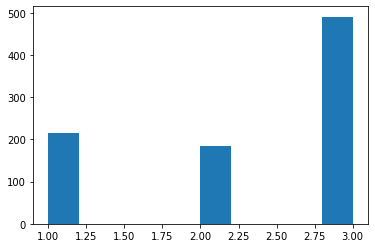

In [105]:
plt.hist(df_train.Pclass)

In [102]:
df_train[(df_train.Age<15) & (df_train.Parch==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Die,Surv,kid,mother
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,0,0,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,1,0,0
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,1,0,0,0
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,0,1,0,0
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,1,0,0,0
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,0,1,1,0
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,0,1,0,0


Seems like there are very few that are travelling alone and that the missing ages won't be a big issue. this could be investigated further, but I won't do it

### Cabins and embarked

In [112]:
df_train['inCabin']=df_train.Cabin.apply(lambda x: 1 if type(x)==str else 0)

In [113]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Die,Surv,kid,mother,inCabin
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.005007,-0.005007,-0.011576,0.072091,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000,0.154447,0.205435,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.338481,-0.338481,0.075072,-0.096645,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.077221,-0.077221,-0.493224,0.110537,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.035322,-0.035322,0.247912,0.051846,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.081629,0.081629,0.287098,0.505227,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.257307,0.257307,-0.005016,0.173401,0.482075
Die,0.005007,-1.000000,0.338481,0.077221,0.035322,-0.081629,-0.257307,1.000000,-1.000000,-0.154447,-0.205435,-0.316912
Surv,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000,0.154447,0.205435,0.316912
kid,-0.011576,0.154447,0.075072,-0.493224,0.247912,0.287098,-0.005016,-0.154447,0.154447,1.000000,-0.065093,-0.009093


Cabin is of course very correlated with where we embarked which might be an issue. 

Finally we will look at where they embarked

In [115]:
df_train[["C","Q","S",]]=pd.get_dummies(df_train.Embarked)

In [116]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Die,Surv,kid,mother,inCabin,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.005007,-0.005007,-0.011576,0.072091,0.019919,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000,0.154447,0.205435,0.316912,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.338481,-0.338481,0.075072,-0.096645,-0.725541,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.077221,-0.077221,-0.493224,0.110537,0.249732,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.035322,-0.035322,0.247912,0.051846,-0.040460,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.081629,0.081629,0.287098,0.505227,0.036987,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.257307,0.257307,-0.005016,0.173401,0.482075,0.269335,-0.117216,-0.166603
Die,0.005007,-1.000000,0.338481,0.077221,0.035322,-0.081629,-0.257307,1.000000,-1.000000,-0.154447,-0.205435,-0.316912,-0.168240,-0.003650,0.155660
Surv,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-1.000000,1.000000,0.154447,0.205435,0.316912,0.168240,0.003650,-0.155660
kid,-0.011576,0.154447,0.075072,-0.493224,0.247912,0.287098,-0.005016,-0.154447,0.154447,1.000000,-0.065093,-0.009093,-0.011064,-0.036841,0.033977


#### Final notes
Other things interesting to look at might be the names which could be processed to have a high correlation with the fare price and socioeconomic status I would guess.

Something related to the ticket. It might contain information about where they were located on the boat. Lower decks had a long way to the life boats

Based on this we can now try to prepare our dataset. We will create a simple method that performs feature engineering and normilazation

### Making the dataset

In [133]:
def prepare_dataset(df):
    df=df.copy()
    ## Crazy inefficient. This is essentially 5 for loops which easily could have been done in one :)
    df[["C","Q","S",]]=pd.get_dummies(df.Embarked)
    df[["Female","Male"]]=pd.get_dummies(df.Sex)
    df[["PClass_1","PClass_2","PClass_3",]]=pd.get_dummies(df.Pclass)
    df['inCabin']=df.Cabin.apply(lambda x: 1 if type(x)==str else 0)
    df['kid']=df.Age.apply(lambda x: 1 if x<7 else 0)
    df['mother']=0
    for idx, row in df.iterrows():
        if row.Sex =="female" and row.Parch and row.Age>20:
            df.loc[idx,['mother']] = 1
    # Drop old columns
    df.drop(columns=['Embarked','Cabin','Pclass','Name','PassengerId','Name','Ticket',"Sex"], inplace=True)
    return df

In [140]:
from sklearn import preprocessing

def normalize_dataset(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=df.columns)

In [135]:
df_train = pd.read_csv("titanic/train.csv")

In [136]:
df_train = prepare_dataset(df_train)

In [138]:
df_train.head(5)

,Survived,Age,SibSp,Parch,Fare,C,Q,S,Female,Male,PClass_1,PClass_2,PClass_3,inCabin,kid,mother
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,0


Normalizing the data

In [142]:
df_train_norm = normalize_dataset(df_train)

In [143]:
eda_completion_time = datetime.now()
print("date and time =",eda_completion_time.strftime("%d/%m/%Y %H:%M:%S"))
print("date and time =", eda_completion_time-competition_start_time)

date and time = 16/02/2023 16:04:51
date and time = 1:23:04.805623


### Training the models

Taking 10 minute break

In [145]:
print("date and time =",datetime.now().strftime("%d/%m/%Y %H:%M:%S"))


date and time = 16/02/2023 16:38:49


We will do 
* Decision tree
* Logistic regression 
* Naive bayes classifier


Ages contains nan values which we will drop them in one instance and not in another

In [181]:
X=df_train_norm.drop(columns="Age").loc[:, df_train_norm.drop(columns="Age").columns!='Survived'].values
y=df_train_norm.drop(columns="Age")["Survived"].values

X_age=df_train_norm.dropna().loc[:, df_train_norm.columns!='Survived'].values
y_age=df_train_norm.dropna()["Survived"].values

In [223]:
from sklearn.model_selection import train_test_split
random_state=20
test_size=0.2

X_train, X_test, y_train, y_test, indices_train,indices_test = train_test_split(X, y,range(len(X)), test_size=test_size, random_state=random_state)
X_train_age, X_test_age, y_train_age, y_test_age, indices_train_age,indices_test_age = train_test_split(X_age, y_age,range(len(X_age)), test_size=test_size, random_state=random_state)

**logistic regression**


In [188]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=random_state).fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_age = LogisticRegression(random_state=random_state).fit(X_train_age, y_train_age)
y_pred_age = clf_age.predict(X_test_age)

In [195]:
from sklearn.metrics import classification_report
print("NOAGE")
print(classification_report(y_test, y_pred,target_names=["Dead","Survived"]))
print("TP", sum(y_pred==y_test))
print("FP", sum(y_pred!=y_test))
print("AGE")
print(classification_report(y_test_age, y_pred_age,target_names=["Dead","Survived"]))
print("TP", sum(y_pred_age==y_test_age))
print("FP", sum(y_pred_age!=y_test_age))

NOAGE
              precision    recall  f1-score   support

        Dead       0.84      0.92      0.88       112
    Survived       0.84      0.70      0.76        67

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179

TP 150
FP 29
AGE
              precision    recall  f1-score   support

        Dead       0.79      0.89      0.84        82
    Survived       0.82      0.69      0.75        61

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

TP 115
FP 28


Not great performance but will do. Let's try some other models. It would also be relavant to take a look at the rows causing trouble. Seems like the extra data of Age performs well.

One could try to interpolate the data missing by mean, mode, median, or an extra model predicting the actual value.

**Decision trees**

In [205]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
args = {
#    "max_depth": 10,
 #   "criterion":"entropy"
}
clf = DecisionTreeClassifier(random_state=random_state, **args).fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_age = DecisionTreeClassifier(random_state=random_state, **args).fit(X_train_age, y_train_age)
y_pred_age = clf_age.predict(X_test_age)

In [206]:
print("NOAGE")
print(classification_report(y_test, y_pred,target_names=["Dead","Survived"]))
print("TP", sum(y_pred==y_test))
print("FP", sum(y_pred!=y_test))
print("AGE")
print(classification_report(y_test_age, y_pred_age,target_names=["Dead","Survived"]))
print("TP", sum(y_pred_age==y_test_age))
print("FP", sum(y_pred_age!=y_test_age))

NOAGE
              precision    recall  f1-score   support

        Dead       0.82      0.87      0.84       112
    Survived       0.75      0.67      0.71        67

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

TP 142
FP 37
AGE
              precision    recall  f1-score   support

        Dead       0.80      0.82      0.81        82
    Survived       0.75      0.72      0.73        61

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

TP 111
FP 32


Not great performance either roughly around 78% accuracy

**Naive bayes**

In [211]:
from sklearn.naive_bayes import GaussianNB

In [213]:
args = {
}
clf = GaussianNB(**args).fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_age = GaussianNB(**args).fit(X_train_age, y_train_age)
y_pred_age = clf_age.predict(X_test_age)

In [214]:
print("NOAGE")
print(classification_report(y_test, y_pred,target_names=["Dead","Survived"]))
print("TP", sum(y_pred==y_test))
print("FP", sum(y_pred!=y_test))
print("AGE")
print(classification_report(y_test_age, y_pred_age,target_names=["Dead","Survived"]))
print("TP", sum(y_pred_age==y_test_age))
print("FP", sum(y_pred_age!=y_test_age))

NOAGE
              precision    recall  f1-score   support

        Dead       0.85      0.88      0.86       112
    Survived       0.78      0.75      0.76        67

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

TP 148
FP 31
AGE
              precision    recall  f1-score   support

        Dead       0.79      0.89      0.84        82
    Survived       0.82      0.69      0.75        61

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

TP 115
FP 28


**SVM**

In [217]:
from sklearn import svm

In [218]:
args = {
}
clf = svm.SVC(**args).fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_age = svm.SVC(**args).fit(X_train_age, y_train_age)
y_pred_age = clf_age.predict(X_test_age)

In [219]:
print("NOAGE")
print(classification_report(y_test, y_pred,target_names=["Dead","Survived"]))
print("TP", sum(y_pred==y_test))
print("FP", sum(y_pred!=y_test))
print("AGE")
print(classification_report(y_test_age, y_pred_age,target_names=["Dead","Survived"]))
print("TP", sum(y_pred_age==y_test_age))
print("FP", sum(y_pred_age!=y_test_age))

NOAGE
              precision    recall  f1-score   support

        Dead       0.79      0.97      0.87       112
    Survived       0.93      0.57      0.70        67

    accuracy                           0.82       179
   macro avg       0.86      0.77      0.79       179
weighted avg       0.84      0.82      0.81       179

TP 147
FP 32
AGE
              precision    recall  f1-score   support

        Dead       0.74      0.98      0.84        82
    Survived       0.94      0.54      0.69        61

    accuracy                           0.79       143
   macro avg       0.84      0.76      0.76       143
weighted avg       0.83      0.79      0.78       143

TP 113
FP 30


Not anything that performans much better than the others. The above will qualify as our baseline and next steps would then be to try to improve them. Steps to do this could be
* What aspects are the models failing on?
* * Investigate these rows
* * Is it the same or could we get benefit from ensamble?
* How is the dataset looking? Too much correlation between variables?
* Try to look closer at the decision tree using treeviz or the values of the logisitc regression

**Difficult rows**

In [235]:
assert (df_train_norm.loc[indices_test]["Survived"].values==y_test).all()

df_train_norm.loc[indices_test][y_pred==y_test]

,Survived,Age,SibSp,Parch,Fare,C,Q,S,Female,Male,PClass_1,PClass_2,PClass_3,inCabin,kid,mother
674,0.0,NaN,0.000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
791,0.0,0.195778,0.000,0.000000,0.050749,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
836,0.0,0.258608,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
56,1.0,0.258608,0.000,0.000000,0.020495,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62,0.0,0.560191,0.125,0.000000,0.162932,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1.0,0.560191,0.125,0.166667,0.321798,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
421,0.0,0.258608,0.000,0.000000,0.015094,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
694,0.0,0.748681,0.000,0.000000,0.051822,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
428,0.0,NaN,0.000,0.000000,0.015127,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Above we have the rows that we are struggeling with for SVM

## The end
I'm not going to work more on it
Takeaways:
* it's super fast to make the models
* Pandas and sklearn is easy - .fit :D
* Getting a baseline is decent, but from here the extra performance get more advanced NN etc. takes time


Looking at the results here:
https://www.kaggle.com/code/grigol1/titanic-40-models

seems like 78% is what most people get

In [236]:
competition_end_time = datetime.now()
print("date and time =",competition_end_time.strftime("%d/%m/%Y %H:%M:%S"))
print("date and time =", competition_end_time-competition_start_time)


date and time = 16/02/2023 17:27:09
date and time = 2:45:22.827382


Around 2 hours